In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/breast_cancer_survival.csv')
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


DATA PREPROCESSING

In [3]:
dataset['Age'].value_counts()

59    15
63    14
50    14
56    13
54    13
46    12
62    11
68    10
53    10
51     9
47     9
45     9
49     9
60     9
61     8
66     8
52     8
77     8
48     7
71     7
79     6
41     6
64     6
74     6
57     6
65     6
58     6
40     6
42     5
44     5
76     5
84     4
85     4
55     4
69     4
80     4
78     4
43     3
72     3
88     3
73     3
67     3
38     3
75     3
39     3
36     3
29     2
83     2
82     2
70     2
87     2
37     2
89     1
35     1
81     1
32     1
90     1
Name: Age, dtype: int64

therefore the age colums looks clean

In [4]:
dataset['Gender'].value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [5]:
(4/330)*100

1.2121212121212122

So there are only 1.21% male in the given dataset, which we can ignore to avoid imbalanced dataset, however we will try some models at the end like xgboost which works good with imbalanced dataset


In [6]:
dataset['Protein1'].isna().sum()

0

In [7]:
dataset['Protein2'].isna().sum()

0

In [8]:
dataset['Protein3'].isna().sum()

0

In [9]:
dataset['Protein4'].isna().sum()

0

Therefore, protien colums look clean without any non integer and null valuess

In [10]:
dataset['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

tumour stage also contains clean data of 3 types

In [11]:
dataset['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

Histology also contains 3 types of species without any empty values

In [12]:
dataset['ER status'].value_counts()

Positive    334
Name: ER status, dtype: int64

In [13]:
dataset['ER status'].value_counts()

Positive    334
Name: ER status, dtype: int64

In [14]:
dataset['HER2 status'].value_counts()

Negative    305
Positive     29
Name: HER2 status, dtype: int64

From here we can see that Er status and Pr status is always positive for every value so we can ignore them in analysizing the data

In [15]:
dataset=dataset.drop(['ER status','PR status'],axis=1)

In [16]:
dataset['Surgery_type'].value_counts()

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

surgery type column also looks clean


For date of surgery and date of last visit

In [17]:
dataset['Date_of_Surgery'] = pd.to_datetime(dataset['Date_of_Surgery'])
dataset['Date_of_Last_Visit'] = pd.to_datetime(dataset['Date_of_Last_Visit'])
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


calculating difference of days between last visit and surgery

In [18]:
dataset['difference'] = (dataset['Date_of_Last_Visit'] - dataset['Date_of_Surgery']).dt.days
dataset['difference'] = dataset['difference']/30
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,difference
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-05-20,2018-08-26,Alive,3.266667
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-04-26,2019-01-25,Dead,9.133333
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive,19.766667
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,2018-11-16,2020-07-28,Alive,20.666667
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive,0.800000


we can drop ther date of surgery and date of last visit now as we have found out the difference

In [19]:
dataset=dataset.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1)
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,difference
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive,3.266667
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,9.133333
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive,19.766667
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive,20.666667
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive,0.800000


In [20]:
col = dataset.pop('difference')
col
dataset.insert(10, 'difference', col)
dataset

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,3.266667,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,9.133333,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,19.766667,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,20.666667,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,0.800000,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,14.566667,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy,9.066667,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy,6.633333,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy,0.300000,Alive


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender']= le.fit_transform(dataset['Gender'])
dataset['HER2 status']= le.fit_transform(dataset['HER2 status'])
dataset['Patient_Status']= le.fit_transform(dataset['Patient_Status'])
#dataset['Tumour_Stage']= le.fit_transform(dataset['Tumour_Stage'])
dataset

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,0,Other,3.266667,0
1,54,0,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,0,Other,9.133333,1
2,63,0,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,0,Lumpectomy,19.766667,0
3,78,0,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,0,Other,20.666667,0
4,42,0,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,14.566667,0
330,41,0,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,1,Modified Radical Mastectomy,9.066667,0
331,54,0,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,0,Simple Mastectomy,6.633333,1
332,74,0,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,0,Lumpectomy,0.300000,0


In [22]:
dataset['difference'].unique()

array([  3.26666667,   9.13333333,  19.76666667,  20.66666667,
         0.8       ,   7.86666667,   7.83333333,  11.53333333,
        18.3       ,          nan,  13.23333333,  10.13333333,
        24.23333333,   0.7       ,   2.66666667,   3.5       ,
         5.6       ,   7.5       ,  18.2       ,  10.7       ,
        15.        ,  13.66666667,  20.26666667,  51.96666667,
        10.53333333,  11.1       ,  11.8       ,   6.16666667,
         1.9       ,   7.96666667,  23.56666667,   4.46666667,
         3.56666667,  14.03333333,   2.83333333,   1.        ,
        10.8       ,   4.66666667,   8.93333333,   1.33333333,
        15.5       ,  11.93333333,  27.1       ,   9.73333333,
        13.2       ,  22.16666667,  10.83333333,   8.63333333,
        18.36666667,   9.1       ,  16.73333333,   2.43333333,
        13.06666667,  25.56666667,   9.9       ,  22.46666667,
        32.1       ,   5.36666667,  18.33333333,  62.93333333,
        14.1       ,  25.36666667,  26.06666667,   2.5 

In [23]:
dataset['difference'].unique()

array([  3.26666667,   9.13333333,  19.76666667,  20.66666667,
         0.8       ,   7.86666667,   7.83333333,  11.53333333,
        18.3       ,          nan,  13.23333333,  10.13333333,
        24.23333333,   0.7       ,   2.66666667,   3.5       ,
         5.6       ,   7.5       ,  18.2       ,  10.7       ,
        15.        ,  13.66666667,  20.26666667,  51.96666667,
        10.53333333,  11.1       ,  11.8       ,   6.16666667,
         1.9       ,   7.96666667,  23.56666667,   4.46666667,
         3.56666667,  14.03333333,   2.83333333,   1.        ,
        10.8       ,   4.66666667,   8.93333333,   1.33333333,
        15.5       ,  11.93333333,  27.1       ,   9.73333333,
        13.2       ,  22.16666667,  10.83333333,   8.63333333,
        18.36666667,   9.1       ,  16.73333333,   2.43333333,
        13.06666667,  25.56666667,   9.9       ,  22.46666667,
        32.1       ,   5.36666667,  18.33333333,  62.93333333,
        14.1       ,  25.36666667,  26.06666667,   2.5 

DATA VISUALISATION

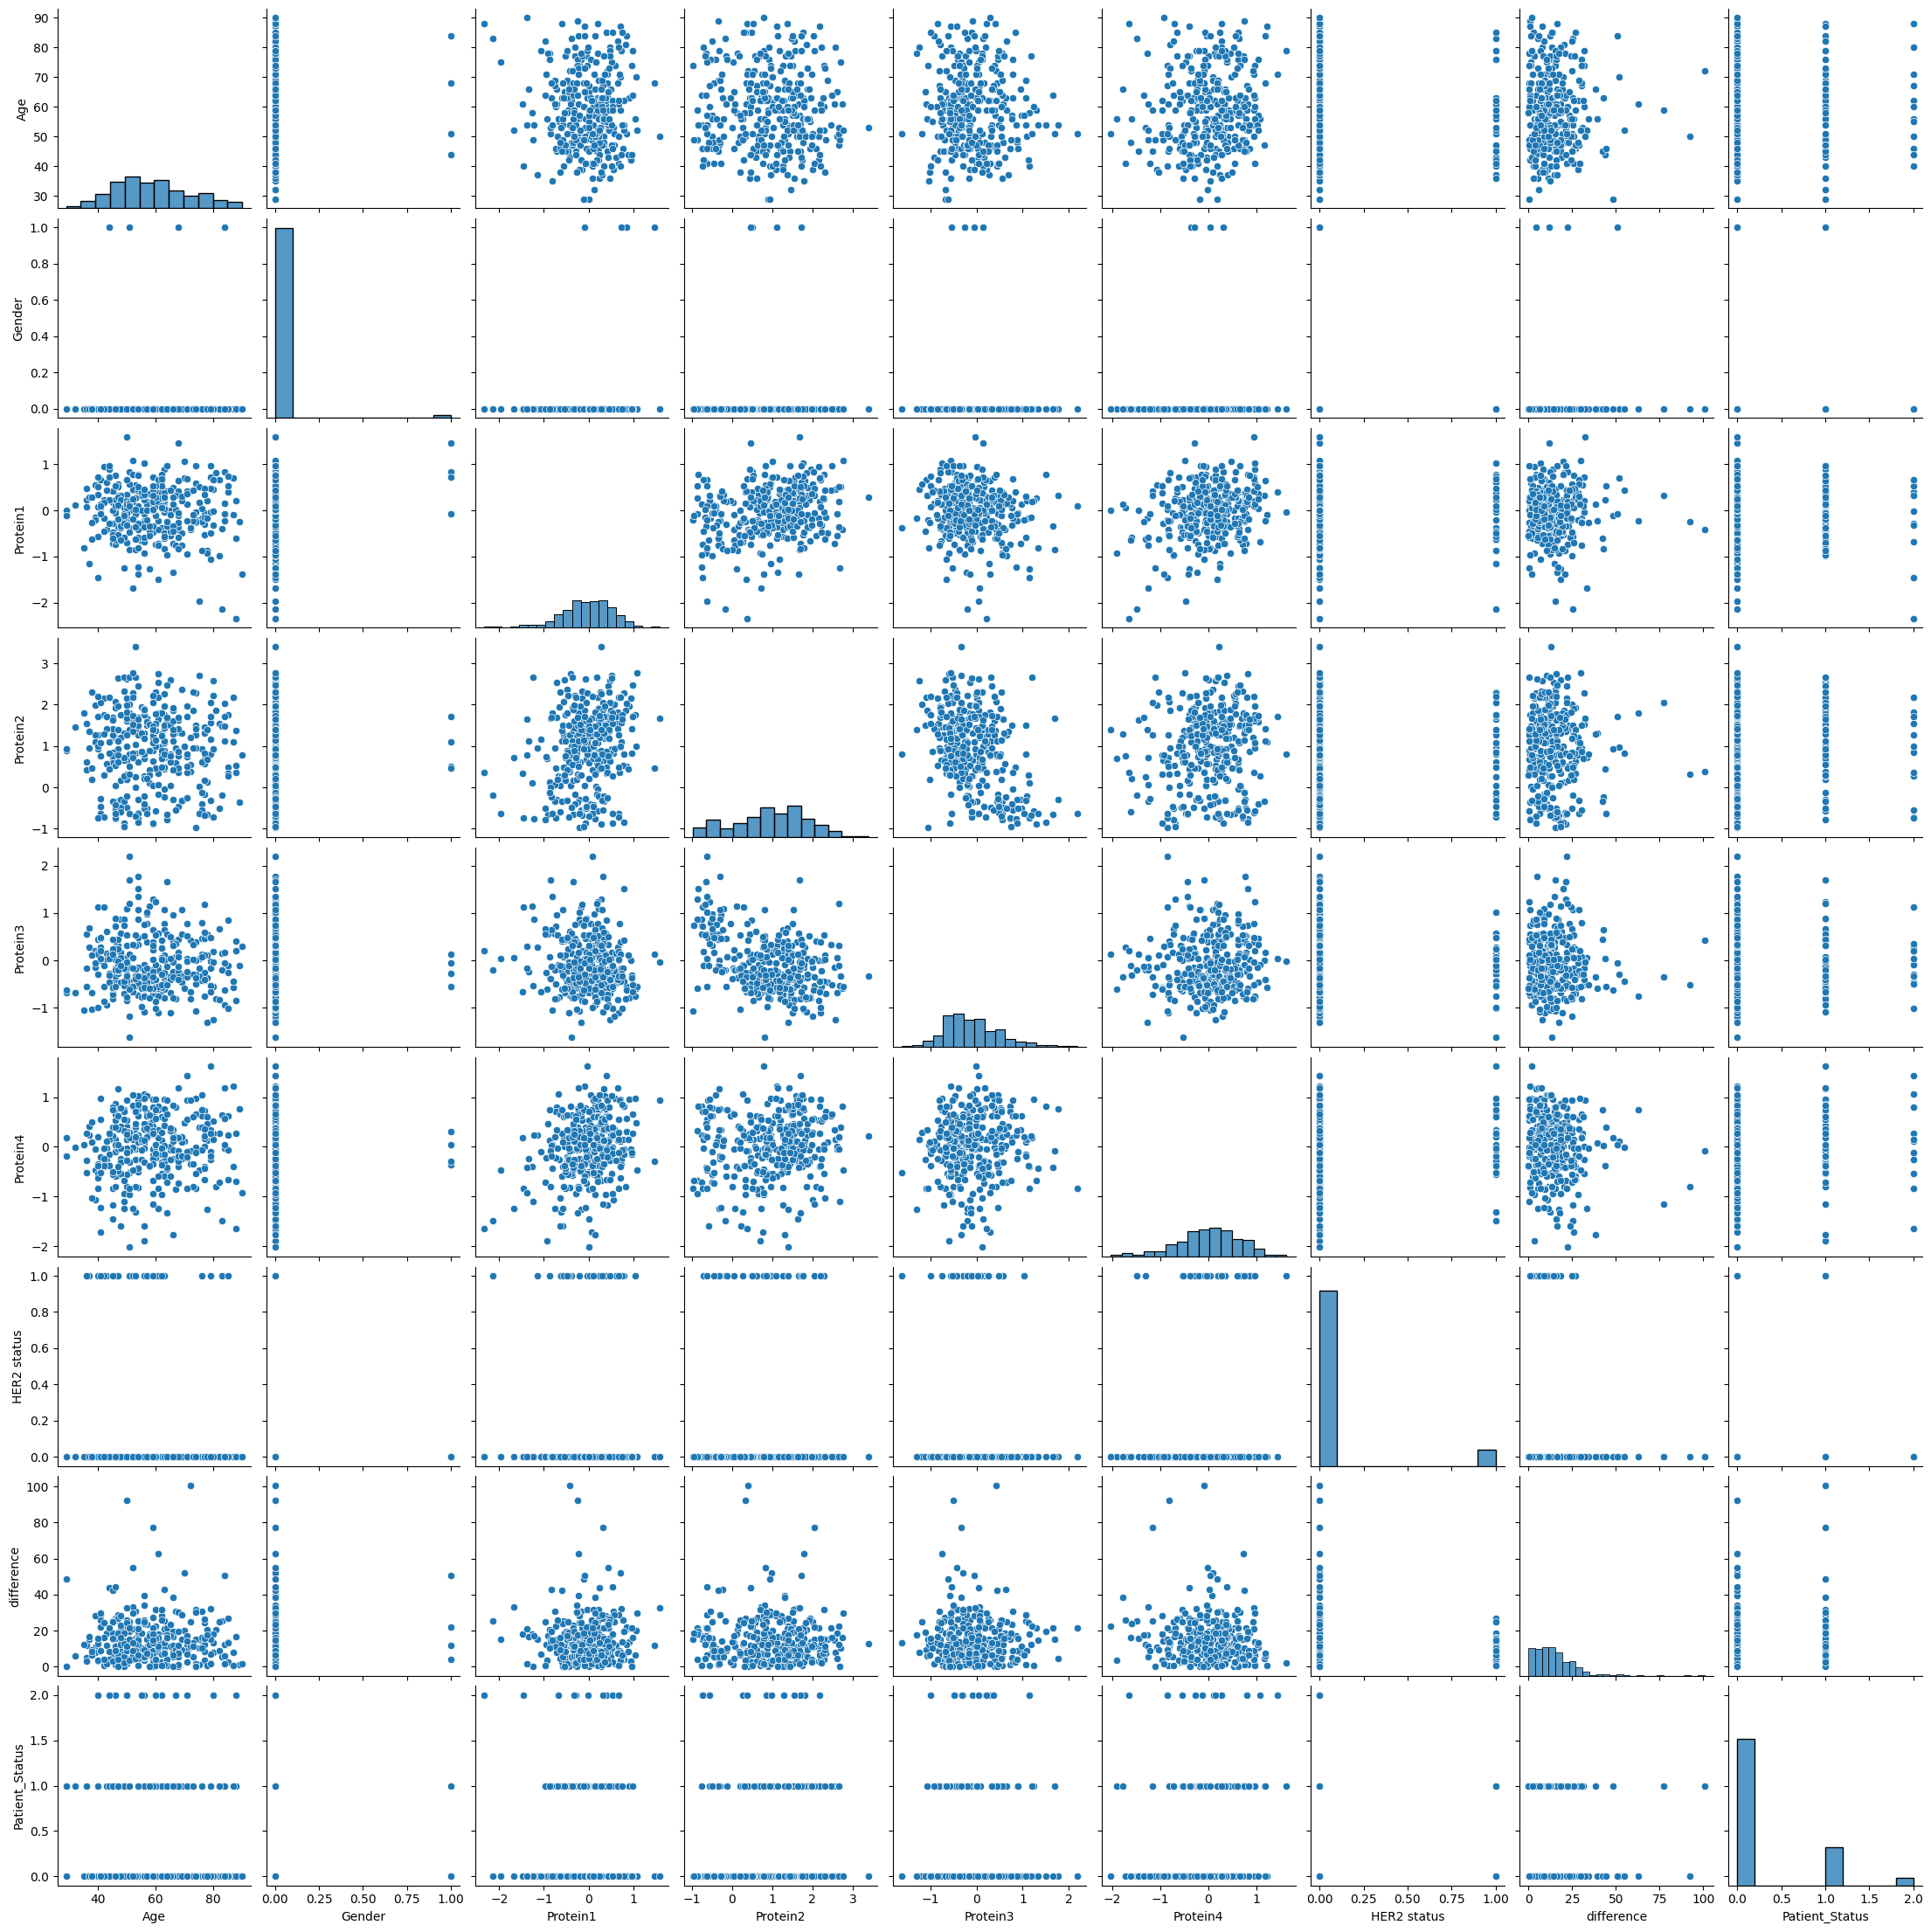

In [24]:
sns.pairplot(dataset)

<ipython-input-25-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

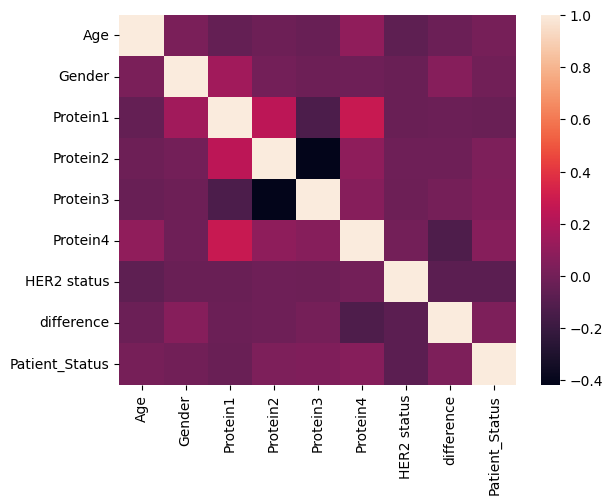

In [25]:
sns.heatmap(dataset.corr())

<Axes: xlabel='count', ylabel='Tumour_Stage'>

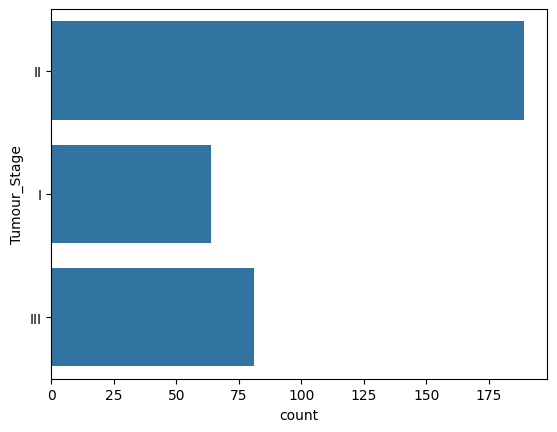

In [26]:
sns.countplot(y=dataset['Tumour_Stage'])

This shows that maximum cases are of tumour stage 2

([0, 1, 2, 3],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

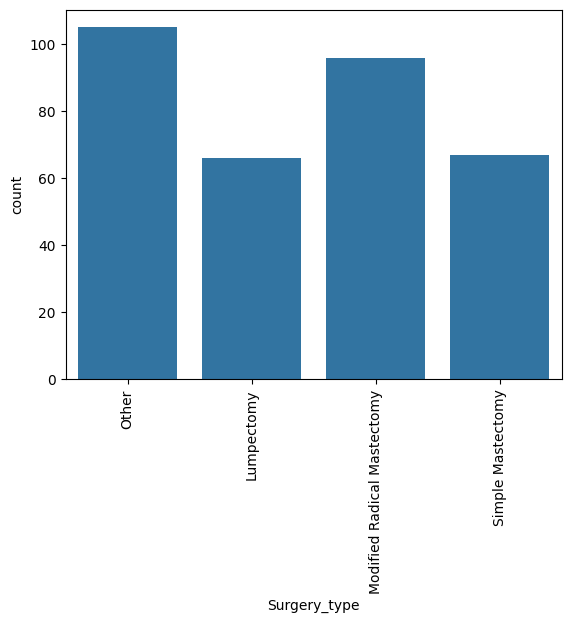

In [27]:
sns.countplot(x=dataset['Surgery_type'])
plt.xticks(rotation=90)

Leading category amongst all is Modified radial Mastectomy

<Axes: xlabel='HER2 status', ylabel='count'>

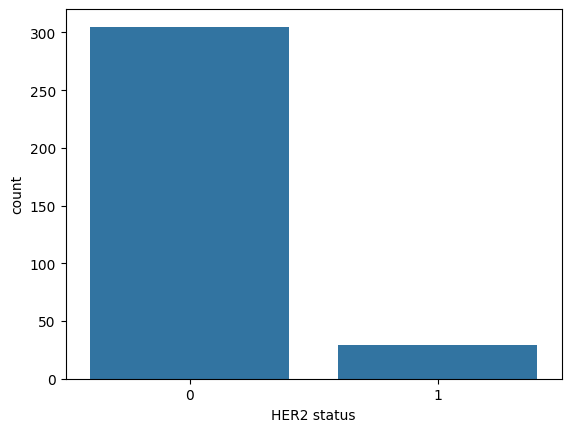

In [28]:
sns.countplot(x=dataset['HER2 status'])

More negative HER2 status than positive

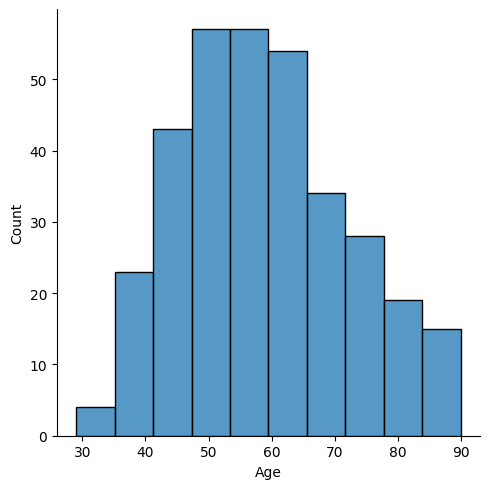

In [29]:
sns.displot(dataset['Age'],bins=10)

Maximum people from age 50-60 are likely to have cancer

In [30]:
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,0,Other,3.266667,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,0,Other,9.133333,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,0,Lumpectomy,19.766667,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,0,Other,20.666667,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,0.800000,0


(50.0, 65.0)

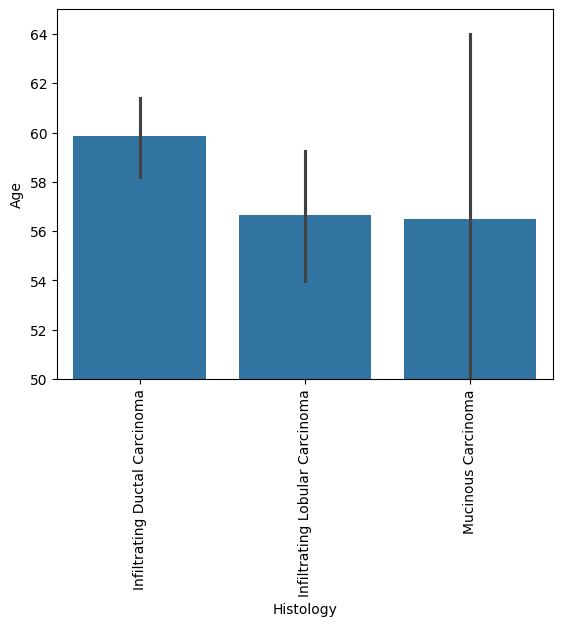

In [31]:
sns.barplot(data=dataset,x='Histology',y='Age')
plt.xticks(rotation=90)
plt.ylim(50,65)

([0, 1, 2, 3],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

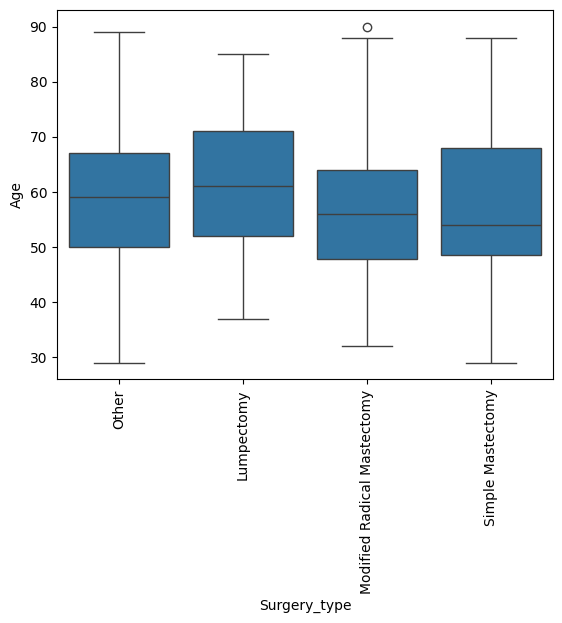

In [32]:
sns.boxplot(data=dataset,x='Surgery_type',y='Age')
plt.xticks(rotation=90)
##plt.ylim(50,65)

This tells us that Simple mastectomy is usually done by younger people and Lumpectomy is usally done by elder people

<Axes: xlabel='Protein1', ylabel='Protein2'>

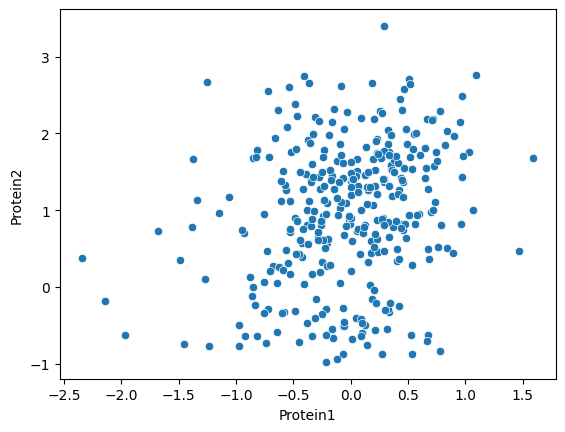

In [33]:
sns.scatterplot(x=dataset['Protein1'],y=dataset['Protein2'])

<Axes: xlabel='Protein1', ylabel='Protein4'>

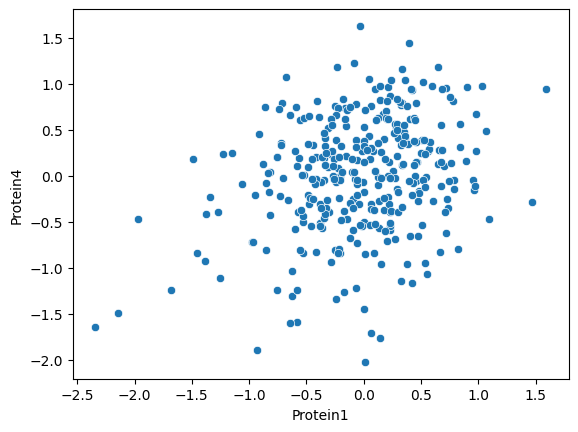

In [34]:
sns.scatterplot(x=dataset['Protein1'],y=dataset['Protein4'])

We have used scatter plot for only protien (1 and 2) and protien(1 and 4) because of the correlation seen in heatmap

<Axes: xlabel='difference', ylabel='Age'>

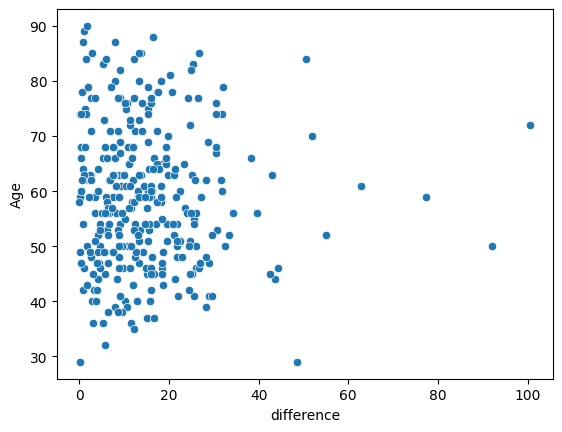

In [35]:
sns.scatterplot(x=dataset['difference'],y=dataset['Age'])

<Axes: xlabel='Tumour_Stage', ylabel='difference'>

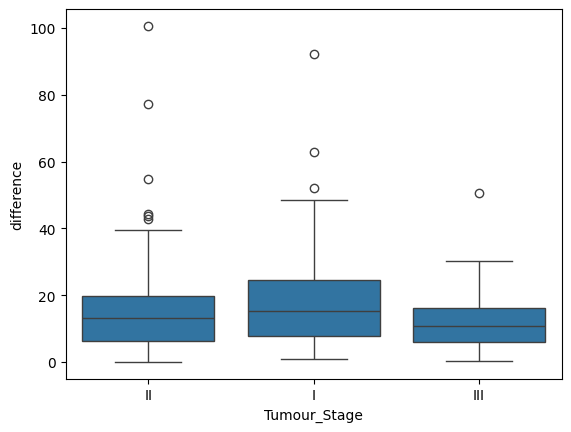

In [36]:
sns.boxplot(x=dataset['Tumour_Stage'],y=dataset['difference'])

([0, 1, 2, 3],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

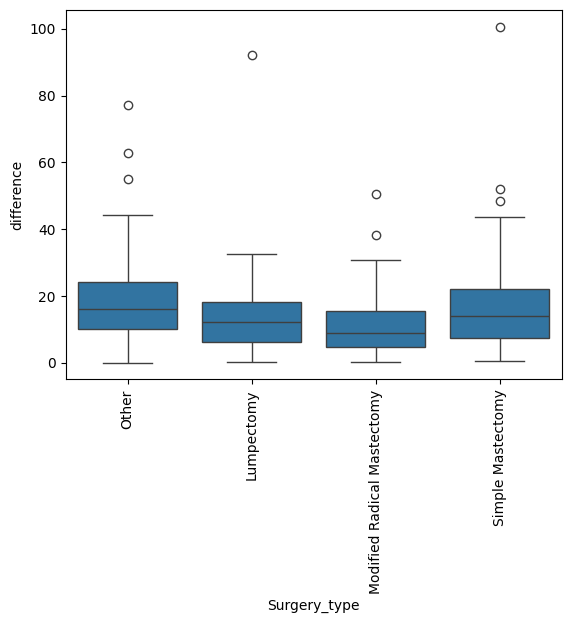

In [37]:
sns.boxplot(x=dataset['Surgery_type'],y=dataset['difference'])
plt.xticks(rotation=90)

This shows that Simple Mastectomy has greater survival time and Modified Radial Mastectomy has lesser survival time acc to the given dataset